In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
calhouse = fetch_california_housing(data_home='task1_data')

In [4]:
calhouse_df = pd.DataFrame(calhouse.data, columns=calhouse.feature_names)

### Task 1.1: Visualize the univariate distribution of each feature, and the distribution of the target

/home/tungngo/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


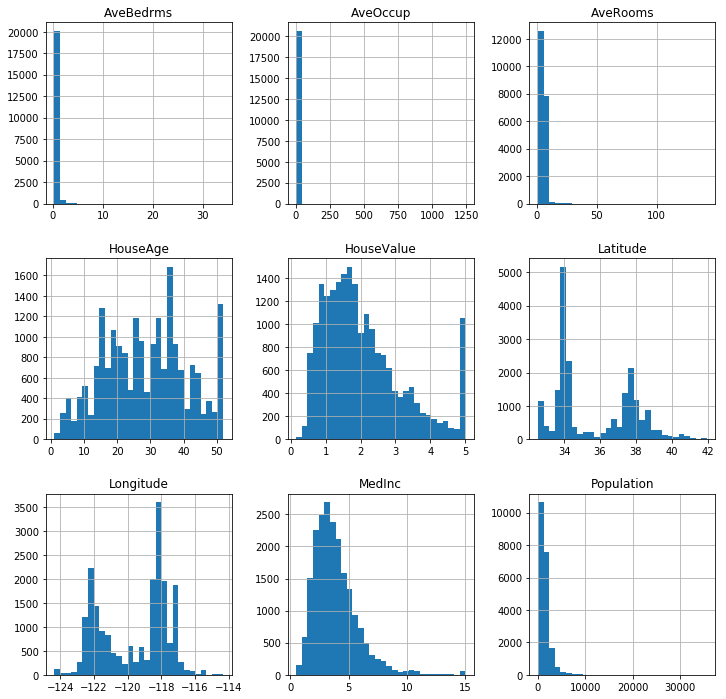

In [5]:
#Visualize distribution of each feature, including target feature
calhouse_target_df = calhouse_df
calhouse_target_df = calhouse_target_df.assign(HouseValue = calhouse.target)
fig2 = plt.figure(figsize = (12,12))
_ = calhouse_target_df.hist(bins = 30, ax = plt.gca())

Observations:

* Outliers in `AveRooms`, `AveBedrms`, `Population`, `AveOccup`. 
    + Most values of these variables are small, except for very small number of data points having big values
* Target value variable `HouseValue` goes up toward the end. Same observation for `HouseAge`.
    + `HouseValue` has 965 values = 5.00001
    + `HouseAge` 1273 values = 52

### Task 1.2: Visualize the dependency of the target on each feature

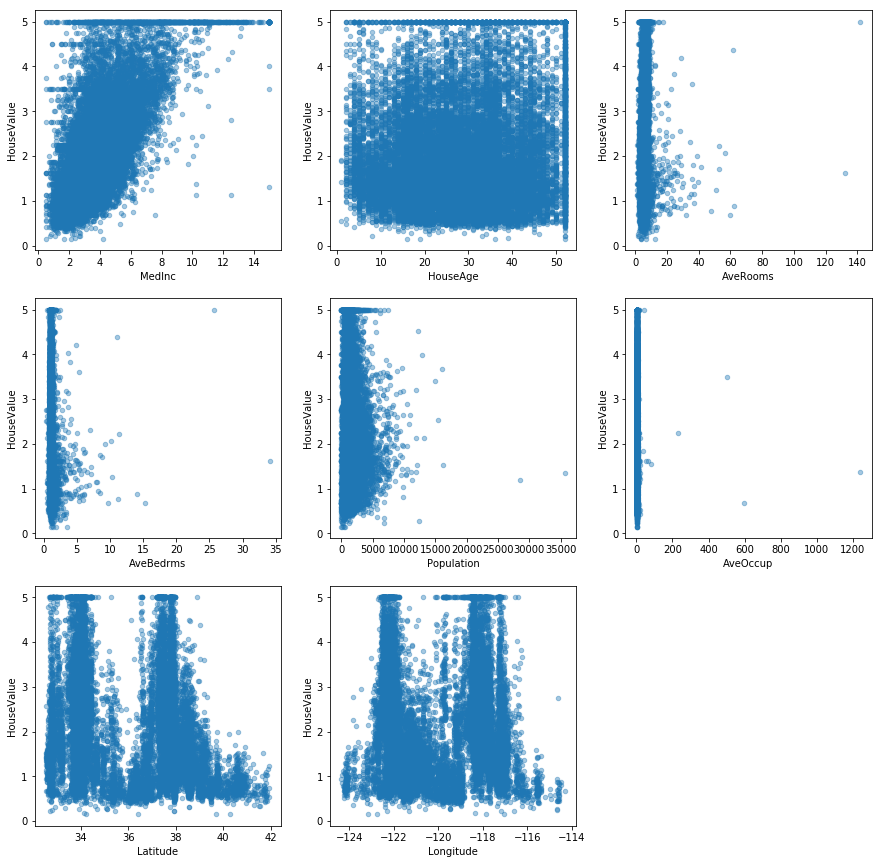

In [6]:
#Visualize the dependency of the target on each feature (2d scatter plot)
fig = plt.figure(figsize=(15,15))
for i in range(1,9):
    ax = fig.add_subplot(3, 3, i)
    calhouse_target_df.plot.scatter(calhouse_target_df.columns.values[i-1],
                                    calhouse_target_df.columns.values[8], ax=ax, alpha=0.4)

### Task 1.3: Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters

In [7]:
X_train, X_test, y_train, y_test = train_test_split(calhouse.data,calhouse.target,random_state=20)

In [8]:
#Linear Regression, Ridge, Lasso
lr_score = np.mean(cross_val_score(LinearRegression(),X_train,y_train))
ridge_score = np.mean(cross_val_score(Ridge(random_state=20),X_train,y_train))
lasso_score = np.mean(cross_val_score(Lasso(random_state=20),X_train,y_train))
enet_score = np.mean(cross_val_score(ElasticNet(random_state=20),X_train,y_train))

In [9]:
print("linear regression score: {}".format(lr_score))
print("ridge regression score: {}".format(ridge_score))
print("lasso regression score: {}".format(lasso_score))
print("elastic net score: {}".format(enet_score))

linear regression score: 0.6009222504208382
ridge regression score: 0.6009322158862299
lasso regression score: 0.27846544566928083
elastic net score: 0.41865896236326555


In [10]:
#Use Standard scaler to scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [11]:
#Use scaled data for regression
slr_score = np.mean(cross_val_score(LinearRegression(),X_train_scaled,y_train))
sridge_score = np.mean(cross_val_score(Ridge(random_state=20),X_train_scaled,y_train))
slasso_score = np.mean(cross_val_score(Lasso(random_state=20),X_train_scaled,y_train))
senet_score = np.mean(cross_val_score(ElasticNet(random_state=20),X_train_scaled,y_train))

In [12]:
print("linear regression score (scaled): {}".format(slr_score))
print("ridge regression score (scaled): {}".format(sridge_score))
print("lasso regression score (scaled): {}".format(slasso_score))
print("elastic net score (scaled): {}".format(senet_score))

linear regression score (scaled): 0.6009222504208398
ridge regression score (scaled): 0.6009303872146475
lasso regression score (scaled): -0.0005254527749588936
elastic net score (scaled): 0.19901416988152856


In [13]:
print("linear regression scaled vs non-scaled: {}".format(slr_score-lr_score))
print("ridge regression scaled vs non-scaled: {}".format(sridge_score-ridge_score))
print("lasso regression scaled vs non-scaled: {}".format(slasso_score-lasso_score))
print("elastic net scaled vs non-scaled: {}".format(senet_score-enet_score))

linear regression scaled vs non-scaled: 1.5543122344752192e-15
ridge regression scaled vs non-scaled: -1.828671582382313e-06
lasso regression scaled vs non-scaled: -0.27899089844423974
elastic net scaled vs non-scaled: -0.219644792481737


Scaling the data does not help improve performance of linear regression or ridge regression. It even worsens the performance of lasso regression and elastic net.

### Task 1.4: Tune the parameters of the models using GridSearchCV

In [14]:
param_grid_ridge = {'alpha': np.logspace(-3, 1, 20)}
grid_ridge = GridSearchCV(Ridge(random_state=20, normalize=True), param_grid_ridge)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=20, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.62378e-03,   2.63665e-03,   4.28133e-03,
         6.95193e-03,   1.12884e-02,   1.83298e-02,   2.97635e-02,
         4.83293e-02,   7.84760e-02,   1.27427e-01,   2.06914e-01,
         3.35982e-01,   5.45559e-01,   8.85867e-01,   1.43845e+00,
         2.33572e+00,   3.79269e+00,   6.15848e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 0.001623776739188721}
0.600990210481


In [16]:
param_grid_lasso = {'alpha': np.logspace(-4, 0, 9)}
grid_lasso = GridSearchCV(Lasso(random_state=20, normalize=True), param_grid_lasso)
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=20,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   3.16228e-04,   1.00000e-03,   3.16228e-03,
         1.00000e-02,   3.16228e-02,   1.00000e-01,   3.16228e-01,
         1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'alpha': 0.0001}
0.598328713871


In [18]:
param_grid_elastic = {'alpha': np.logspace(-4, -1, 7),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
grid_elastic = GridSearchCV(ElasticNet(random_state=20, normalize=True), param_grid_elastic)
grid_elastic.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=20, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.0001 ,  0.00032,  0.001  ,  0.00316,  0.01   ,  0.03162,  0.1    ]), 'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
print(grid_elastic.best_params_)
print(grid_elastic.best_score_)

{'alpha': 0.0001, 'l1_ratio': 1}
0.598328713871


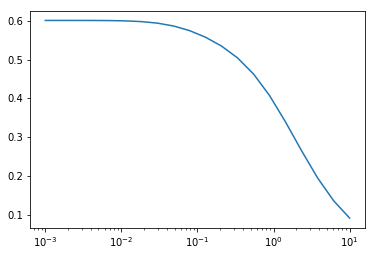

In [20]:
#Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet
ridge_line, = plt.semilogx(param_grid_ridge['alpha'],grid_ridge.cv_results_['mean_test_score'])

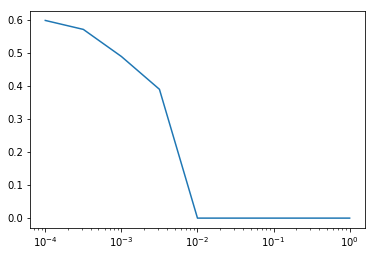

In [21]:
lasso_line, = plt.semilogx(param_grid_lasso['alpha'],grid_lasso.cv_results_['mean_test_score'])

In [22]:
elastic_net_para = pd.pivot_table(pd.DataFrame(grid_elastic.cv_results_),
    values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

In [23]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

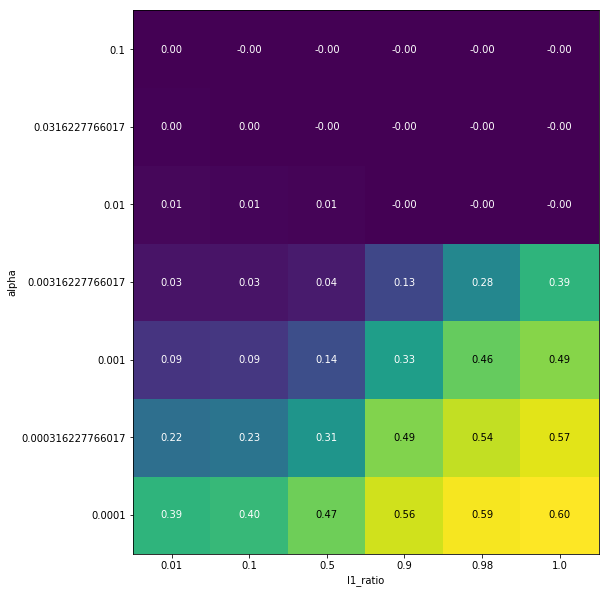

In [24]:
plt.figure(figsize=(10,10))
heatmap(elastic_net_para,'l1_ratio','alpha',xticklabels=elastic_net_para.columns,yticklabels=elastic_net_para.index)

Tuning the parameter helps Lasso regression and Elastic Net approach the accuracy of linear regression and ridge regression, but tuning does not help improve the accuracy of the best model. The best score still stays at 60.1% - belongs to linear regression and ridge regression.

### Task 1.5

In [25]:
#Visualize the coefficients of the resulting models

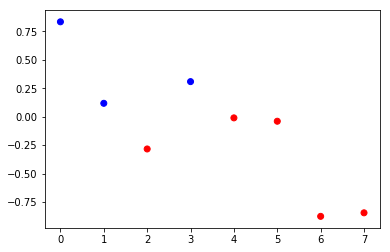

In [26]:
#Linear regression
lr_est = LinearRegression().fit(X_train_scaled,y_train)
plt.scatter(range(X_train_scaled.shape[1]), lr_est.coef_,
            c=np.sign(lr_est.coef_), cmap="bwr_r")

In [27]:
lr_est.coef_

array([ 0.83400129,  0.11738854, -0.28411895,  0.30813331, -0.01071326,
       -0.04025842, -0.87663514, -0.84554562])

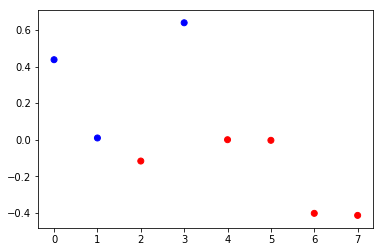

In [28]:
#Ridge regression
ridge_est = grid_ridge.best_estimator_
plt.scatter(range(X_train.shape[1]), ridge_est.coef_,
            c=np.sign(ridge_est.coef_), cmap="bwr_r")

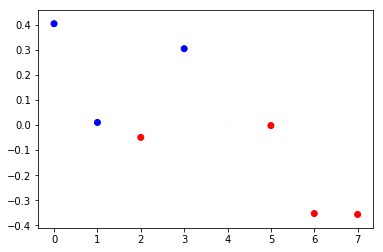

In [29]:
#Lasso regression
lasso_est = grid_lasso.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso_est.coef_,
            c=np.sign(lasso_est.coef_), cmap="bwr_r")

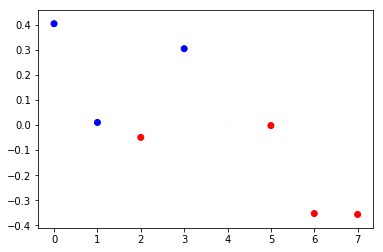

In [30]:
#Elastic Net
elastic_est = grid_elastic.best_estimator_
plt.scatter(range(X_train.shape[1]), elastic_est.coef_,
            c=np.sign(elastic_est.coef_), cmap="bwr_r")

All models agree on which features have positive or negative coefficients. However, the resulting models differ in term of scale of features. While linear regression seems to take negative and positive-coefficient features to the extreme, ridge regression scales down these coefficients - which is expected from the effect of regularization. We can say the same about lasso regression and elastic net when compared with linear regression (for example, features 0,6,7 are lower in absolute values in the 3 models - around 0.4 - compared to linear regression around 0.8). The resulting models of lasso regression and elastic net are very similar as the l1 ratio of elastic net is 1. Final observation is that feature 3 of ridge regression have higher importance - positive coefficient of around 0.6 - compared to other 3 models - coefficient of around 0.3 